<center> <h1> [SI4C-L1] 4MEO/MIN INSTRUMENTATION </h1> 
 <br> <h2> Computer session 3 : Error measurement, statistical and frequency analysis
    
    warm up
 </h2> </center>

#### First name: Nicolas

<span>

#### Last name : Samelson

<span>

#### Noma : 17288

# First things first 

In this first computer session, we will use Python and Jupyter Notebook. The "cheatsheet" is made available in the computer session materials and the idea is to provide a quick reference for switching from matlab to python.

<ul>
  <li>Tutorial for windows users: https://coessing.files.wordpress.com/2019/08/jupyternotebook_tutorial_bypaige.pdf
</li>
  <li>Tutorial for Mac and Linux users : https://www.dataquest.io/blog/jupyter-notebook-tutorial/
</li>
  <li>About Python programming : https://www.learnpython.org/en/Welcome -> https://realpython.com/python-first-steps/ 
</li>
</ul>  

For theorical questions please refere to the support materials of the instrumentation course.


## Part I : measurement errors

### EXO A : Linearity error

Given a varing input $x$ and the corresponding instrument outputs $y$, we want to analyse the instrument characteristics in the aim of evaluating the need of calibration.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

pl.rcParams['figure.figsize'] = 10, 8 
pl.rcParams['font.size'] = 18

x = np.r_[np.linspace(20,220,10), np.linspace(180,0,9)]
y = np.array([20,40,59,77,97,117,137,156,175,195,176,156,136,117,97,78,58,39,20])

<b> <p>
1. Print the content of x and y 
2. Plot the curve representing the instrument response.
3. What can you say about the measured values ?</b> </p>

[ 20.          42.22222222  64.44444444  86.66666667 108.88888889
 131.11111111 153.33333333 175.55555556 197.77777778 220.
 180.         157.5        135.         112.5         90.
  67.5         45.          22.5          0.        ]
[ 20  40  59  77  97 117 137 156 175 195 176 156 136 117  97  78  58  39
  20]


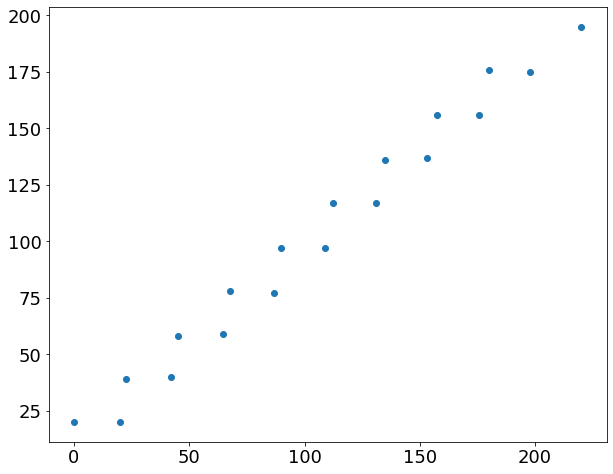

In [10]:
# 1
print(x)
print(y)

# 2
# to see the linearity error
#pl.plot(x,y)
pl.scatter(x,y)

# to see the triangular signals
#pl.plot(x)
#pl.plot(y)

# 3
# We can see that the input values are not linear (x1,y1) = (42.22,40), 
# Linearity means there is a linear relationship between the input and output. 
# However there is a deviation from true linearity => linearity error
# and the output values are rounded and "smoothed" to get a triangular signal


In order to estimate the linearity error, we are going to use curve fitting and try to fit a polynomial to the cloud of points represented in the first figure.
In other words, we are looking for the p coefficient of the polynomial p(x) = p[0] * xn + ... + p[n] * x1 + x0 that make the curve of p fits the curve of y curve.

<b> <p>
4. Based on a first degree fitting polynomial, compute the coefficients of the polynomial functions.  
5. Evaluate the polynomial p at the values given by x.   
6. Print the measured and the fitting data contents, then plot their curves together in the same graph.   
7. What can you say about the results ?
</b> </p>

Hint : See polynomial fitting APIs : numpy.polyfit ( https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html )

coefficients of the polynomial func 
 [ 0.8402436  13.74265035]
array of best fitted linear function 
 [ 30.54752243  49.21960251  67.89168259  86.56376267 105.23584275
 123.90792283 142.58000291 161.25208299 179.92416307 198.59624315
 164.98649901 146.08101792 127.17553684 108.27005576  89.36457468
  70.4590936   51.55361252  32.64813143  13.74265035]


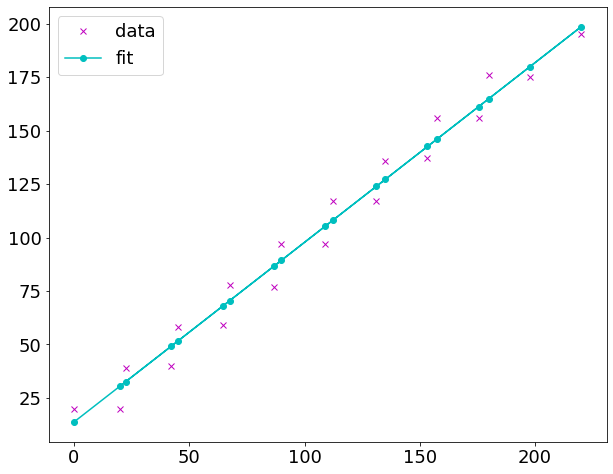

In [42]:

# 4 & 5
# numpy.polyfit(x, y, deg)
# Fit a polynomial of degree deg to points (x, y). 
"""p(x) = p[0] * x**deg + ... + p[deg]""" 
# Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
p = np.polyfit(x,y,1) # deg 1 because linear

# 6
z = np.polyval(p,x)

pl.plot(x,y,"xm")
pl.plot(x,z,"-co")
pl.legend(('data','fit'),loc='best')

# pl.scatter(x,z)

print("coefficients of the polynomial func \n",p)
#print(q)
print("array of best fitted linear function \n", z)

# z is a linear approximation that minimizes the squared error and finds the function 
# that fits the best the measured values

In [43]:
from IPython.display import Image
Image(url= "linearity formulas.png", width=400, height=400)

The main goal behind the linear fitting is to estimate the linearity error.

Given the formulas below :
<b> <p>
8. Compute linearity error.  
9. What is the maximum error and the range of the instrument ?</b> </p>

In [53]:

# 8
# residuals gives the the sum of least squares.
# z, residuals, rank, singular_values, rcond = np.polyfit(x, y, 1, full=True)
# print("the sum of the errors is ",residuals)

# correction :

# max error
epsi_l = abs(y - z) # distance between each point of y and z
epsi_ml = max(epsi_l)
print("the max error btween y and z is : ",epsi_ml)

# range
range_0 = max(y) - min(y)
print("the range of the instrument is : ", range_0)

# linearity error
lin_error = epsi_ml / range_0 * 100
print("the linearity error is : ", lin_error,"%")


the max error btween y and z is :  11.013500994003607
the range of the instrument is :  175
the linearity error is :  6.293429139430633 %


<b> <p> 10. using errorbar API plot the linearity error </b> </p>

Text(0, 0.5, '$z$')

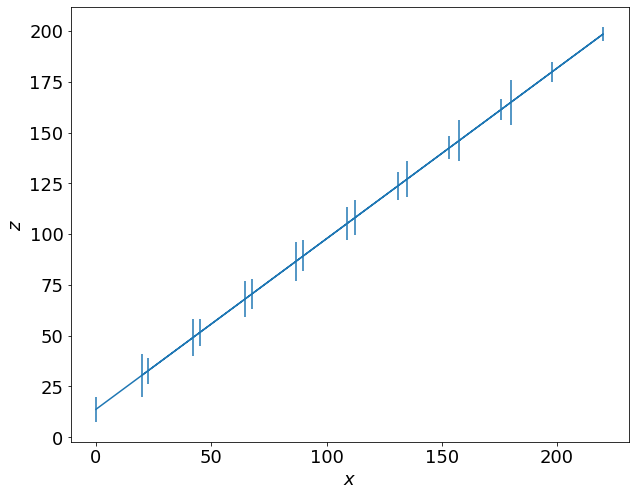

In [56]:
# 10
pl.errorbar(x,z,1*epsi_l)
pl.xlabel(r'$x$')
pl.ylabel(r'$z$')

### EXO B : Hysterisis

In [57]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 6 
mpl.rcParams['font.size'] = 18
from IPython.display import Image 

In [58]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])
y = np.array([0.1, 1.1, 2.1, 3.0, 4.1, 5.0, 5.0, 4.2, 3.2, 2.2, 1.2, 0.2])

<b> <p>1. Plot the calibration curve with the lines connecting points. What do you say about it ?</b> </p>

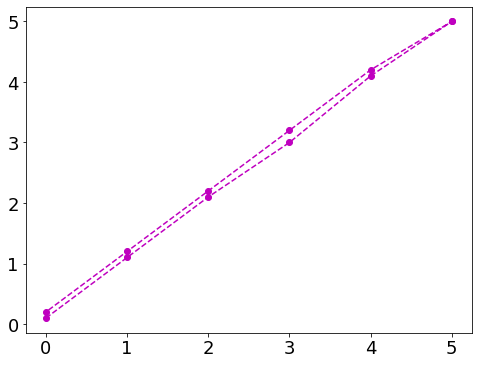

In [65]:
# 1
pl.plot(x,y,'--mo')

# there is an hysteresys effect : the trajectory of the curve doesn't pass on its own footprints
# there is a dependence of the state of the system on its history

In [63]:
from IPython.display import Image
Image(url= "hysterisis.png", width=400, height=400)

<b> <p>2. Estimate the hysterisis(%).</b> </p>

In [71]:
# 2 

# split in the increasing points and decreasing
yup = y[:6] # the increasing points
ydown = np.flipud(y[6:]) # the decreasing points flipped vertically
print("yup : ",yup,"\nydown : ",ydown)

# difference
eh = yup - ydown 
print("eh : ",eh)

# find max
ehmax = max(abs(eh))
print("max eh : ",ehmax)

# hysteresis
hyste = 100* ehmax / (max(y)- min(y))
print("hysteresis : ", hyste, "%")


yup :  [0.1 1.1 2.1 3.  4.1 5. ] 
ydown :  [0.2 1.2 2.2 3.2 4.2 5. ]
eh :  [-0.1 -0.1 -0.1 -0.2 -0.1  0. ]
max eh :  0.20000000000000018
hysteresis :  4.081632653061228 %


### EXO C : Sensitivity

In [78]:
import numpy as np
import matplotlib.pyplot as pl
%pylab inline
#%matplotlib inline

import sys
from IPython.core.display import Image 

Populating the interactive namespace from numpy and matplotlib


<b> <p>
1. Given the calibration data (x,y) plot the calibration curve.
2. Compute the sensitivty of the instrument for all the data and plot the corresponding sensitivity curve. </b> </p>

In [79]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

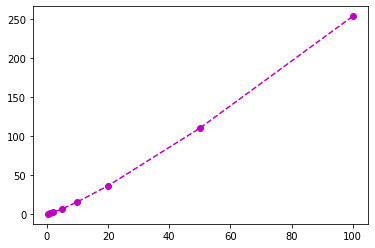

In [89]:
# 1
pl.plot(x,y,'--mo')

x diff :  [ 0.5  1.   3.   5.  10.  30.  50. ] 
y diff :  [  0.6   1.3   4.6   8.9  20.6  73.7 143.1]
sensitivity :  [1.2        1.3        1.53333333 1.78       2.06       2.45666667
 2.862     ]


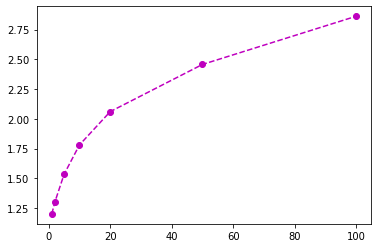

In [90]:
# 2
"""
Sensitivity drift : amount by which an instrument's sensitivity of 
measurement varies as the ambiant conditions change
"""
# numpy.diff(a,n=1)
# Calculate the n-th discrete difference along the given axis.
# The first difference is given by 
"""out[i] = a[i+1] - a[i]"""

xdiff = np.diff(x)
ydiff = np.diff(y)
print("x diff : ",xdiff,"\ny diff : ",ydiff)

K = ydiff / xdiff
print("sensitivity : ",K)
pl.plot(x[1:],K,'--mo')

<b> <p>
3. Take a logarithmic scale instead of a linear scale and plot the sensitivity curve again. what can you say about the data sensitivity ?  
4. Compute and then plot the curve corresponding to the logarithmic sensitivity. </b> </p>

x log :  [0.30103    0.30103    0.39794001 0.30103    0.30103    0.39794001
 0.30103   ] 

y log :  [0.39794001 0.36172784 0.47712125 0.359808   0.3624443  0.48068594
 0.36167638]

Log sensitivity :  [1.32192809 1.20163386 1.19897785 1.19525629 1.20401389 1.20793568
 1.20146294]


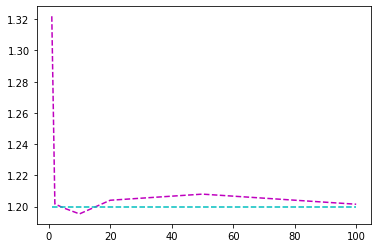

In [108]:
# 3

# np.log10 : Return the base 10 logarithm of the input array, element-wise.
ylog = np.diff(np.log10(y))
xlog = np.diff(np.log10(x))
print("x log : ",xlog,"\n\ny log : ",ylog)

logK = ylog / xlog
print("\nLog sensitivity : ",logK)

pl.plot(x[1:],logK,'--m')

"""
except for the first point, the sensitivity is overall pretty constant
We can conclude it is not affected by external conditions except for the first data
"""
# 4
pl.plot([x[1],x[-1]],[1.2,1.2],'c--') # blue line




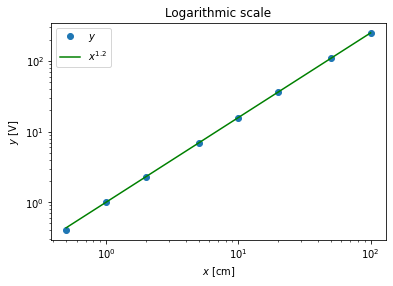

In [109]:
# scale
pl.loglog(x,y,'o',x,x**(1.2),'g')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Part II : Statistical analysis

### EXO A:  Why errors often look Gaussian ?

The central limit theorem (CLT) is the reason sums or averages of measurements appear to be well-described by a Gaussian distibution.

Suppose we have $N$ random variables $X_n$ from an distribution with finite variance.

The central limit theorem states that the sample mean $S_N$ approaches a Gaussian distribution with the same mean and variance as the measurements $X_N$.
That is, if the mean and variance of $X_n$ are given by $E[X_n] = \mu$ and $\mathrm{var}[X_n] = \sigma^2$, respectively, then the sample mean $S_N$ of $N$ measurements
$$S_N = \frac{1}{N} \sum_{n=1}^N X_n \rightarrow N(\mu, \sigma^2/N)$$
where $N(\mu, \sigma^2/N)$ denotes the normal (Gaussian) distribution with mean $\mu$ and variance $\sigma^2/N$:    
$$p(S_N | \mu, \sigma^2/N) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\left[-\frac{(S_N - \mu)^2}{2 \sigma^2/N}\right]$$

This also means that the variance of the sample mean $S_N$ shrinks as $N^{-1}$ as the sample size $N$ grows!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


 <b> <p> 1. Implement the 'sample' function that computes 100000 random samples from a Gumbel distribution with a location of 1.5 and a scale of 3.0, and outputs the computed samples and their mean.
</b> </p>

In [46]:
# 1
"""
The Gumbel (or Smallest Extreme Value (SEV) or the Smallest Extreme Value Type I) 
distribution is one of a class of Generalized Extreme Value (GEV) distributions used 
in modeling extreme value problems. The Gumbel is a special case of the Extreme Value Type I distribution 
for maximums from distributions with “exponential-like” tails.
"""

def sample(N, sample_size=100000):
    location = 1.5
    scale = 3.0
    
    # Gumbel : Draw samples from a Gumbel distribution with specified location and scale.
    # The location of the mode of the distribution. Default is 0.
    # The scale parameter of the distribution. Default is 1. Must be non- negative.
    # Sample size : If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
    X_n = np.random.gumbel(location, scale, [sample_size, N])
    
    MeanX_n = X_n[:,:].mean(axis=1) # returns the mean of each array within the big array
    
    
    return X_n, MeanX_n


X_n  :  [[ 6.00519013]
 [ 2.25151376]
 [-0.23788038]
 ...
 [ 3.10435097]
 [ 1.73623417]
 [-0.16911895]]
Mean :  [ 6.00519013  2.25151376 -0.23788038 ...  3.10435097  1.73623417
 -0.16911895]


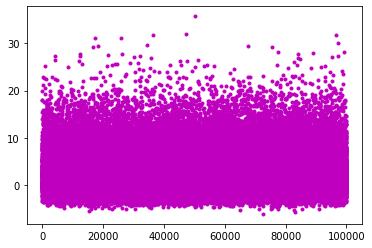

In [47]:
X_n , MeanX_n= sample(1)
plt.figure()
plt.plot(MeanX_n,'.m')
print("X_n  : ",X_n)
print("Mean : ",MeanX_n)

<b> <p> 2. Implement a function 'show_gaussian_fit', that computes the gaussian fit to the distrution of the dat, then plots the distribution of X_n and its Gaussian fit for comparison. </b> </p>


In [48]:
from scipy.stats import norm
def show_gaussian_fit(sample, bins):
    mean = sample.mean()
    sigma = sample.std() # compute the standard deviation along the specified axis.
    bin_size=   (bins[1] - bins[0])
    a = sample.size * bin_size
    
 
    gauss = a / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mean) ** 2 / (2 * sigma ** 2))
    
    
    fig,ax = plt.subplots()
    ax.hist(sample, bins) # histogram of distributed points
    ax.plot(bins,gauss) # plot the gauss function
    
    # Label plot.
    ax.set_xlabel('x');
    ax.set_ylabel('p(x)');

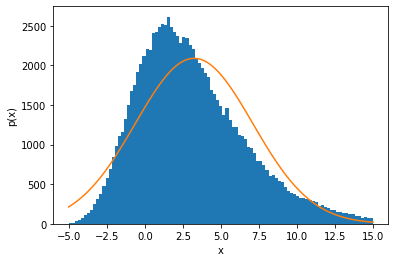

In [57]:
bins = np.linspace(-5, 15, 100);
show_gaussian_fit(MeanX_n, bins);

<b> <p>
    
3. Repeat the same process for samples of 3 , 10 and then 100.
    
4. What can you say about the data distribution ?

</b> </p>

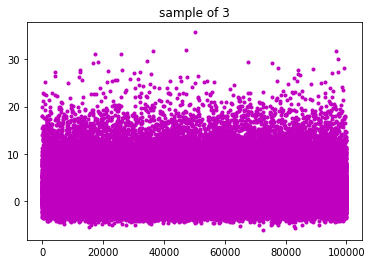

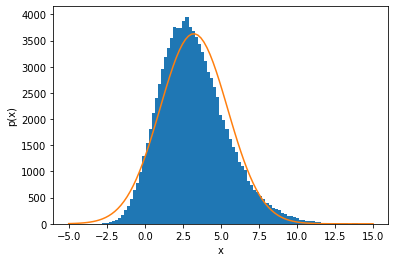

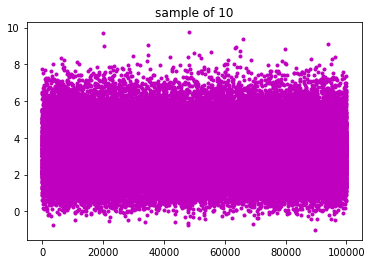

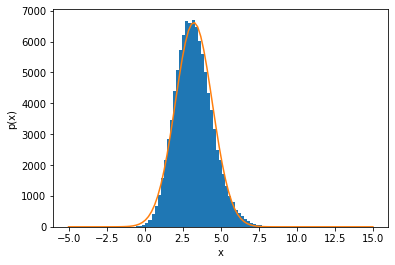

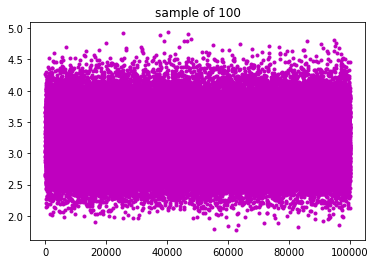

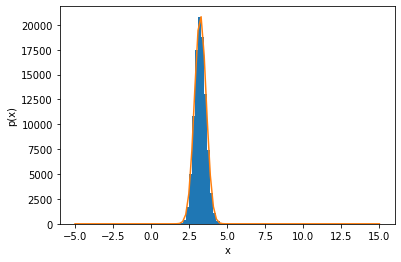

In [61]:
# 3 

""" with 3"""
X_n3 , MeanX_n3 = sample(3)
plt.figure()
plt.plot(MeanX_n,'.m')
plt.title("sample of 3")
show_gaussian_fit(MeanX_n3, bins);


""" with 10"""
X_n10 , MeanX_n10 = sample(10)
plt.figure()
plt.plot(MeanX_n10,'.m')
plt.title("sample of 10")
show_gaussian_fit(MeanX_n10, bins);

""" with 100"""
X_n100 , MeanX_n100 = sample(100)
plt.figure()
plt.plot(MeanX_n100,'.m')
plt.title("sample of 100")
show_gaussian_fit(MeanX_n100, bins);

# 4
# The more it's increased, the more the points are distributed in a closed "window", 
# this means the points are distributed in a more precise way

## Part III : Create your toolbox for the frequency analysis

### Exo A : Signal construction

In [122]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
from pylab import plot, show, title, xlabel, ylabel, subplot

<b> <p>1. create a DISCRETE periodic signal with an offset 'oft', a magnitude 'a1' and a fundamental frequency 'f1'
    
    fs and N  being the sampling frequency and the number of samples respectively.
</b> </p>

In [123]:
def discrete_signal(fs,N, f1, a1, oft):
    """ create a DISCRETE periodic signal """
    dt = 1./fs
    t = np.linspace(0,N * dt,N)
    y =  oft + a1 * np.sin(2 * np.pi * f1 * t) # y = offset + Amplitude * sin(2 * w * t)
    
    return t, y

t0 =  0.0
y[t0]  2.0 

tf =  20.0
y[tf]  2.000000000000039


Text(0, 0.5, 'y(t)')

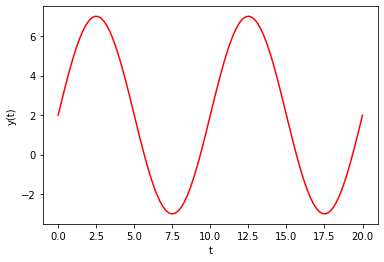

In [124]:
f1 = 10  # fundamental freq
a1 = 5.0 # amplitude of 5
oft = 2  # up offset
fs = 5   # frequency
N = 100

t,y = discrete_signal(fs,N, f1, a1, oft)
print("t0 = ", t[0])
print("y[t0] ", y[0], "\n")

print("tf = ", t[-1])
print("y[tf] ", y[-1])

plot(t,y,'r')
xlabel('t')
ylabel('y(t)')

<b> <p>2. create a function that adds normalized and centred Gaussian noise on top of the signal y.</b> </p>

In [125]:
def noisy_signal(y_noise,N):
    """ Adds normalized and centred Gaussian noise on top of the descrete signal"""
    # random.normal(loc=0.0, scale=1.0, size=None)
    # loc = centre of the distribution = mean
    # scale = standard deviation = sigma 
    # size = number of points to draw
    noise = np.random.normal(0,1,N) # Draw random samples from a normal (Gaussian) distribution.

    y_noise += noise
    
    return t, y_noise

Text(0, 0.5, 'y_noise(t)')

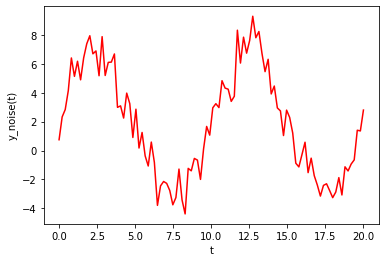

In [126]:
t,y_noise = noisy_signal(y,N)

plot(t,y_noise,'r')
xlabel('t')
ylabel('y_noise(t)')

<b> <p>3. create a function that computes the spectrum of a sampled signal y with a sampling frequency fs.</b> </p>

In [127]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    """
    n = len(y) # length of the signal    
    k = np.arange(n) # Return evenly spaced values within a given interval. ex n = 3 => array([0, 1, 2])
    T = n/Fs   # time of cycle
    
    frq = k/T  # two sides frequency range
    frq = frq[range(np.int64(n/2))] # one side frequency range
    
    Y = 2* fft.fft(y)/n # Fast Fourrier Transform computing and normalization
    Y = Y[range(np.int64(n/2))]
    
    return frq, Y

<b> <p>4. create a function that plots the spectrum of a sampled signal y with a sampling frequency fs.</b> </p>

In [128]:
def plotspectrum(y,Fs):
    frq, Y = spectrum(y, Fs)
    
    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')
    



<b> <p> Let's take back our toy example ! 
    
    5. For a sampling frequency of 150 Hz, a fundamental frequency of 5 Hz, plot the spectrum of the noisy sigal and the original sinoisidal signal ( one componenent). 

</b> </p>

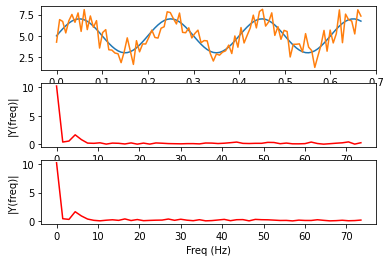

In [135]:
# 5

a1 = 2.0 # amplitude of 5
oft = 5.0  # up offset
N = 100
Fs = 150
Ff = 5

# discrete
t,y = discrete_signal(Fs,N, Ff, a1, oft)
subplot(3,1,1)
plot(t,y)

# noisy
t_n, y_noise = noisy_signal(y,N)
plot(t,y_noise)

# spectrum not noisy
subplot(3,1,2)
plotspectrum(y,Fs)

# spectrum noisy
subplot(3,1,3)
plotspectrum(y_n,Fs) # we can find a diff at the end of the curve, compared to not noisy

<b> <p>6. create a function that plots the time signal y(t) and the spectrum Y(f) after removing the DC component. </b> </p>

In [151]:
def plotSignal(t,y,fs):
    """ plots the time signal y(t) and the 
    frequency spectrum Y(fs), after removing
    the DC component. 
    Inputs:
        t - time signal, [sec]
        y - values, [Volt]
        fs - sampling frequency, [Hz]
    Outputs:
        plot with two subplots: y(t) and the spectrum Y(f) 
    """
    #compute
    y = y - y.mean()      # removes the DC component
    frq,Y = spectrum(y,fs) 
    
    # Plot    
    # subplot 1
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t,y,'b-')
    plt.xlabel('$t$ [s]')
    plt.ylabel('$Y$ [V]')
    
    # subplot 2
    plt.subplot(2,1,2)
    plt.plot(frq, abs(Y),'r') # plotting the spectrum
    plt.xlabel('$f$ (Hz)')
    plt.ylabel('$|Y(f)|$')  
    

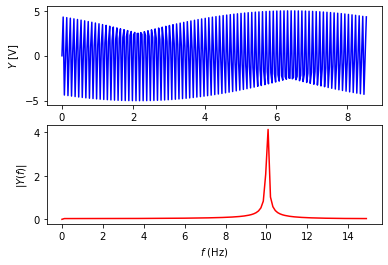

In [156]:
fs,N, f1, a1, oft = 30, 256, 10, 5.0, 2
t,y = discrete_signal(fs,N, f1, a1, oft)
plotSignal(t,y,fs)

<b> <p>7. Implement the sampling, quantization and clipping function as described in the comments. </b> </p>

In [169]:
def sampling(t,y,fs):
    """ sampling of a signal y(t) at frequency fs [Hz]
    inputs:
        t  - time signal [s], array of floats, dense sampled
        y  - signal [Volt], array of floats
        fs  - sampling frequency [Hz], float
    """
    
    #sampling
    dt = 1./fs
    
    # np.arange(start,stop, step)
    # Return evenly spaced values within a given interval. 
    # EX np.arange(3) => array([0, 1, 2])
    # EX np.arange(-3, 3, 0.5, dtype=int)
    # => array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
    
    ts = np.arange(t[0],t[-1],dt) # create an array from t0 to tf with dt steps
    
    # numpy.interp(x, xp, fp, left=None, right=None)
    
    # One-dimensional linear interpolation for monotonically increasing sample points.
    # Returns the one-dimensional piecewise linear interpolant to 
    # a function with given discrete data points (xp, fp), evaluated at x.
    
    ys = np.interp(ts,t,y,left=0.0,right=0.0) # sample and holds the value unitil the next step in the ts array (ADC)
    
    
    return ts,ys

In [170]:
def quantization(ys,N):
    """quantization of a signal
    inputs:
        ts - time signal [s], array
        ys - signal [Volt], array
        N  - number of bits, scalar (2,4,8,12,...)
    outputs:
        yq - digitized signal at N bits
    """
    #quantization
    # gives a finite discrete value to the samples
        
    max_value = 2**(N-1) - 1 # corresponds to the max number of steps k = 2^N where N is the size of the ADC
    
    yq = (ys*(max_value)).astype(np.int32) / (max_value) # rounds to the step
    
    return yq
# print(quantization(y,3))

In [171]:
def clipping(y,miny=-5,maxy=5):
    """ clipping of signal 
    inputs: 
        y - signal [V] array of floats
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
    outputs:
        y - clipped signal [V]
    """
    #clipping
    y[y < miny] = miny
    y[y > maxy] = maxy # wth is it doing?

    return y

<b> <p>8. Implement the sample and hold reconstruction as described in the comments. </b> </p>

In [179]:
def sample_hold_reconstruction(t, ts, yq, method=None):
    """ sampling and holding 
    inputs: 
        yq - digitized signal at N bits
        ts - time signal [s], array
        t  - time signal [s], array of floats, dense sampled

    outputs:
        yr - reconstructed signal
    """
    # sample and hold reconstruction
    # whaaaaaaaaaat
    if method == 'soh': 
        tr = t
        soh = interp1d(ts, yq, kind='zero', bounds_error=False,fill_value=yq[-1])
        yr = soh(tr)

    elif method == None:
        tr = ts
        yr = yq
    else:
        raise(ValueError)
    
    return tr, yr

<b> <p>9. Implement the adc using the function of your selfcreated toolbox as described in the comments. </b> </p>

In [180]:
# sample and hold
from scipy.interpolate import interp1d

def adc(t,y,fs=1.,N=4,miny=-5.,maxy=5.,method=None):
    """ A/D conversion
    Inputs:
        t - time [s] array of floats,
        y - signal [V] array of floats,
        fs - sampling frequency [Hz], scalar float,
        N - number of bits of the A/D converter, (2,4,8,12,14,...)
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
        method - the reconstruction method: 'zoh' = zero-and-hold, 'soh' - sample and hold or None
    outputs:
        ts - sampled times [s]
        yq - sampled and digitized signal [V]
        yr - reconstructed, sample-and-hold signal [V]

    """
    # first sample
    ts,ys = sampling(t,y,fs)
    
    # clipping
    ys = clipping(ys,miny,maxy)
    
    # digitize
    yq = quantization(ys,N)
    
    # reconstruct
    tr,yr = sample_hold_reconstruction(t, ts, yq, method='soh')
        
    return ts,yq,tr,yr

<b> <p>10. Test and conclude. </b> </p>

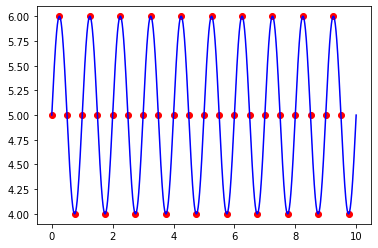

In [181]:
# example 1:

t = np.linspace(0,10, 10000)
y = 5+np.sin(2*np.pi*1*t)
ts,yq,tr,yr = adc(t,y,fs=4,N=14,miny=0,maxy=10) # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(t, y,'b-')

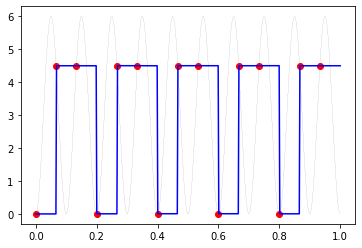

In [182]:
# example 2
t = np.linspace(0,1.,500)
y = 3+3*np.sin(2*np.pi*10*t-np.pi/2.)

ts,yq,tr,yr = adc(t,y,fs=15,N=12,miny=0,maxy=10,method='soh') # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')

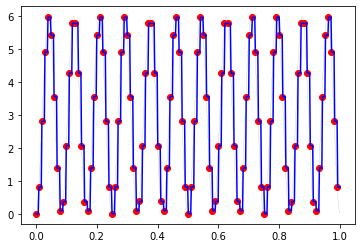

In [188]:
# example 2
t = np.linspace(0,1.,500)
y = 3+3*np.sin(2*np.pi*12*t-np.pi/2.)

ts,yq,tr,yr = adc(t,y,fs=100,N=12,miny=0,maxy=10,method='soh') # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')

#### N.B : The jupyter notebook is to be sent via teams.

##### Lecturers

Tahani Madmad : mdm@ecam.be

<span>

Nicolas Marchand : mch@ecam.be